In [1]:
import numpy as np
import pandas as pd
import scipy
from rdkit.Chem import PandasTools
from rdkit import DataStructs
from rdkit.Chem import AllChem, MolFromSmiles, Draw
import xgboost as xgb
from xgboost import XGBClassifier
import pickle
from shiny import App, render, ui

In [3]:
# list of cytochrome p-450 enzymes
cyps = ['CYP2C19', 'CYP2D6', 'CYP3A4', 'CYP1A2', 'CYP2C9', 'CYP23A4']

ml_models = {}
for cyp in cyps:
    with open("model_"+cyp, 'rb') as file:
        ml_models[cyp] = pickle.load(file)


In [9]:
def customPredict(s, ml_models, cyps) -> pd.DataFrame:
    """ Predicts if a given molcule inhibits CYP or not.

     Args:
         s: SMILES representation of a molecule.
         ml_models: ML Models for each CYP Enzyme
         cyps : List of CYP450 enzymes
     Returns:
         A Dataframe the contains CYP Enzymes and Predictions.
    """
    cyps = ['CYP2C19', 'CYP2D6', 'CYP3A4', 'CYP1A2', 'CYP2C9', 'CYP23A4']
    mol = MolFromSmiles(s)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    arr = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)
    preds = ['Yes' if ml_models[i].predict(np.stack([arr]))[0] == 1 else 'No' for i in cyps]
    # pred = xgb_model.predict(np.stack([arr]))[0]

    return pd.DataFrame({'CYP450' : cyps, 'Inhibition' : preds})



In [10]:
s = 'NC(=O)C1=CN([C@@H]2O[C@@H](COP(=O)([O-])OP(=O)([O-])OC[C@@H]3O[C@H](n4cnc5c(N)ncnc54)[C@@H](OP(=O)([O-])[O-])[C@@H]3O)[C@H](O)[C@@H]2O)C=CC1.[Na+].[Na+].[Na+].[Na+]'

In [11]:
customPredict(s, ml_models, cyps)

,CYP450,Inhibition
0,CYP2C19,No
1,CYP2D6,No
2,CYP3A4,No
3,CYP1A2,No
4,CYP2C9,No
5,CYP23A4,No


In [7]:
def compute_fingerprint(s, r, nBits) -> np.ndarray:
    """Featurize Rdkit Mol into Morgan Fingerprint bit vectors.

     Args:
         s: SMILES representation of a molecule.
         r: radius
         nBits: Bit Vector Length

     Returns:
         numpy.ndarray: A 1-D numpy array of the featurized molecule.
    """
    mol = MolFromSmiles(s)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, r, nBits=nBits)
    arr = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [41]:
def customPredict(s) -> int:
    """Predicts if a given molcule inhibits CYP or not.

     Args:
         s: SMILES representation of a molecule.
         

     Returns:
         0 or 1.
    """
    mol = MolFromSmiles(s)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    arr = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)
    pred = xgb_model.predict(np.stack([arr]))[0]
    return pred
def mol_to_image(s):
    """Transforms SMILES Representation to an Image.

     Args:
         s: SMILES representation of a molecule.
         

     Returns:
         Image of a given molecule.
    """
    mol = MolFromSmiles(s)
    img = Draw.MolToImage(mol)
    return img
    

In [42]:
customPredict('NC(=O)C1=CN([C@@H]2O[C@@H](COP(=O)([O-])OP(=O)([O-])OC[C@@H]3O[C@H](n4cnc5c(N)ncnc54)[C@@H](OP(=O)([O-])[O-])[C@@H]3O)[C@H](O)[C@@H]2O)C=CC1.[Na+].[Na+].[Na+].[Na+]')

0

In [29]:
m = MolFromSmiles('NC(=O)C1=CN([C@@H]2O[C@@H](COP(=O)([O-])OP(=O)([O-])OC[C@@H]3O[C@H](n4cnc5c(N)ncnc54)[C@@H](OP(=O)([O-])[O-])[C@@H]3O)[C@H](O)[C@@H]2O)C=CC1.[Na+].[Na+].[Na+].[Na+]')

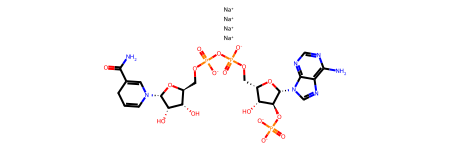

In [30]:
m

In [43]:
img = Draw.MolToImage(m)

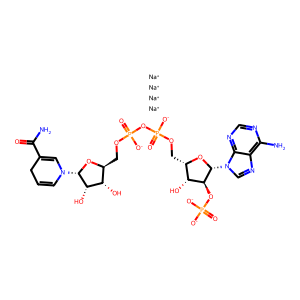

In [44]:
img

In [27]:
fp = compute_fingerprint('NC(=O)C1=CN([C@@H]2O[C@@H](COP(=O)([O-])OP(=O)([O-])OC[C@@H]3O[C@H](n4cnc5c(N)ncnc54)[C@@H](OP(=O)([O-])[O-])[C@@H]3O)[C@H](O)[C@@H]2O)C=CC1.[Na+].[Na+].[Na+].[Na+]', 2, 2048)

In [28]:
sum(fp)

75

In [26]:
np.stack([fp]).shape

(1, 2048)

In [21]:
fp.shape

(2048,)

In [15]:
with open("model_CYP3A4", 'rb') as file:
    xgb_model = pickle.load(file)

In [40]:
xgb_model.predict(np.stack([fp]))[0]

0

In [32]:
xgb_model.predict_proba(np.stack([fp]))[:, 1]

array([0.00035123], dtype=float32)

In [33]:
m1 = MolFromSmiles('NS(=O)(=O)c1cccc2c1c([N+](=O)[O-])cc1nc([O-])c([O-])nc12.[Na+].[Na+]')

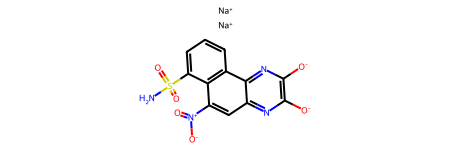

In [34]:
m1

In [35]:
fp_1 = compute_fingerprint('NS(=O)(=O)c1cccc2c1c([N+](=O)[O-])cc1nc([O-])c([O-])nc12.[Na+].[Na+]', 2, 2048)

In [36]:
xgb_model.predict_proba(np.stack([fp_1]))[:, 1]

array([0.03393367], dtype=float32)